# Data quality and completeness checks

Distribution of y (generation values) 

Check for negative values (shouldn't exist for PV)

Percentage of zero values (nighttime + low-light periods)

Missing values and gaps in time series


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

In [6]:
# Data paths
DATA_DIR = '..\data'

In [29]:
generation = pd.read_parquet(f'{DATA_DIR}/generation.parquet')
metadata = pd.read_parquet(f'{DATA_DIR}/metadata.parquet')
weather = pd.read_parquet(f'{DATA_DIR}/weather.parquet')

In [26]:
print(f"Generation: {generation.shape}, Columns: {generation.columns.tolist()}")
print(f"Metadata: {metadata.shape}, Columns: {metadata.columns.tolist()}")
print(f"Weather: {weather.shape}, Columns: {weather.columns.tolist()}")

Generation: (42616800, 3), Columns: ['unique_id', 'timestamp', 'y']
Metadata: (475, 13), Columns: ['unique_id', 'dataset', 'building_id', 'latitude', 'longitude', 'location_id', 'location', 'timezone', 'freq', 'dc_capacity', 'ac_capacity', 'tilt', 'azimuth']
Weather: (10797648, 33), Columns: ['timestamp', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm', 'is_day', 'sunshine_duration', 'shortwave_radiation', 'direct_radiation', 'diffuse_radiation', 'direct_normal_irradiance', 'terrestrial_radiation', 'location_id']


In [44]:
generation.head(10)

,unique_id,timestamp,y
20757888,0001953ce171ce70,2014-01-01 01:00:00,0.0
20757889,0001953ce171ce70,2014-01-01 01:15:00,0.0
20757890,0001953ce171ce70,2014-01-01 01:30:00,0.0
20757891,0001953ce171ce70,2014-01-01 01:45:00,0.0
20757892,0001953ce171ce70,2014-01-01 02:00:00,0.0
20757893,0001953ce171ce70,2014-01-01 02:15:00,0.0
20757894,0001953ce171ce70,2014-01-01 02:30:00,0.0
20757895,0001953ce171ce70,2014-01-01 02:45:00,0.0
20757896,0001953ce171ce70,2014-01-01 03:00:00,0.0
20757897,0001953ce171ce70,2014-01-01 03:15:00,0.0


In [71]:
weather.head(100)

,timestamp,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,terrestrial_radiation,location_id
0,2012-12-31 22:00:00,9.393499,87.625008,7.4435,3.563058,0.9,0.9,0.0,0.0,53.0,1000.299988,1000.420959,100.0,100.0,100.0,100.0,0.021354,0.146158,35.450405,214.658417,64.799995,8.193500,7.8935,0.528,0.509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u15x8ntvmq63
1,2012-12-31 22:00:00,9.450000,88.230011,7.6000,3.511946,0.8,0.8,0.0,0.0,53.0,999.400024,999.641724,100.0,98.0,100.0,100.0,0.020426,0.139541,36.452553,214.945740,65.520004,8.250000,7.8000,0.580,0.561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u17900tcm36m
2,2012-12-31 22:00:00,9.300000,88.216827,7.4500,3.471147,0.9,0.9,0.0,0.0,53.0,1000.299988,999.937134,100.0,100.0,100.0,100.0,0.019781,0.138296,35.450405,214.658417,64.799995,8.200000,7.7500,0.611,0.593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u1787bf7vxej
3,2012-12-31 22:00:00,9.287001,88.215675,7.4370,3.454961,0.9,0.9,0.0,0.0,53.0,1000.299988,999.695312,100.0,100.0,100.0,100.0,0.019769,0.138189,35.450405,214.658417,64.799995,8.187000,7.7370,0.611,0.593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u1787fdqjxg1
4,2012-12-31 22:00:00,9.263000,87.314041,7.2630,3.547751,0.9,0.9,0.0,0.0,53.0,1000.500000,1000.137085,100.0,100.0,100.0,100.0,0.021363,0.148522,34.358788,215.188828,64.799995,8.113000,7.9130,0.421,0.406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u15xvxu8twzr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2012-12-31 22:00:00,9.256500,87.313423,7.2565,3.539676,0.9,0.9,0.0,0.0,53.0,1000.500000,1000.016113,100.0,100.0,100.0,100.0,0.021357,0.148465,34.358788,215.188828,64.799995,8.106501,7.9065,0.421,0.406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u178jcefyxpg
96,2012-12-31 22:00:00,9.300000,88.216827,7.4500,3.471147,0.9,0.9,0.0,0.0,53.0,1000.299988,999.937134,100.0,100.0,100.0,100.0,0.019781,0.138296,35.450405,214.658417,64.799995,8.200000,7.7500,0.611,0.593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u178k2bgzxsj
97,2012-12-31 22:00:00,9.282500,87.614777,7.3325,3.730391,0.8,0.8,0.0,0.0,53.0,1000.799988,1000.315979,100.0,100.0,100.0,100.0,0.020102,0.145192,33.355900,214.890778,63.360001,8.182500,7.9325,0.286,0.270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u17be05mn0hq
98,2012-12-31 22:00:00,9.293500,87.615784,7.3435,3.438621,0.9,0.9,0.0,0.0,53.0,1000.299988,1000.058105,100.0,100.0,100.0,100.0,0.021255,0.145287,35.450405,214.658417,64.799995,8.143499,7.9435,0.422,0.406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,u15xujcwqwge


In [65]:
metadata.head()

,unique_id,dataset,building_id,latitude,longitude,location_id,location,timezone,freq,dc_capacity,ac_capacity,tilt,azimuth
0,6f8872976c8fe471,Utrecht,ID001,52.03,5.17,u15xvxu8twzr,"Utrecht, NL",Europe/Amsterdam,15T,2.711,2.67,42.0,150.0
1,5aa2ce692360ec76,Utrecht,ID002,51.97,5.33,u15z9kc5nn0j,"Utrecht, NL",Europe/Amsterdam,15T,1.902,2.00,30.0,170.0
2,bc2963b70fa99ae5,Utrecht,ID003,52.11,5.13,u178kwrdc8j4,"Utrecht, NL",Europe/Amsterdam,15T,2.503,2.25,40.0,203.0
3,e6e9ca9bda5ea7b0,Utrecht,ID004,52.10,5.12,u178ks822xut,"Utrecht, NL",Europe/Amsterdam,15T,2.087,2.03,35.0,190.0
4,85cd9f684a271939,Utrecht,ID005,52.07,5.13,u178hxp99xt0,"Utrecht, NL",Europe/Amsterdam,15T,2.413,2.50,15.0,180.0


In [31]:
generation.groupby('unique_id').agg(
    start=('timestamp', 'min'),
    end=('timestamp', 'max'),
    num=('y', 'size'),
    zero_ratio=('y', lambda x: (x == 0).mean()),
    max_y=('y', 'max')
)


,start,end,num,zero_ratio,max_y
unique_id,,,,,
0001953ce171ce70,2014-01-01 01:00:00,2018-01-01 00:45:00,140240,0.107808,0.751928
003ab28018b79b3e,2010-06-30 23:30:00,2013-12-06 23:00:00,50880,0.557056,0.438000
01357f3a8206bd40,2014-01-01 01:00:00,2018-01-01 00:45:00,140240,0.593525,1.011450
01b0edf27070e6dc,2010-06-30 23:30:00,2013-12-06 23:00:00,50880,0.550511,0.456000
01d18234ff385eb4,2010-06-30 23:30:00,2013-12-06 23:00:00,50880,0.542138,0.494000
...,...,...,...,...,...
fc083e613604ccea,2014-01-01 01:00:00,2018-01-01 00:45:00,140240,0.137578,1.029450
fc973f67cd82d7fc,2010-06-30 23:30:00,2013-12-06 23:00:00,50880,0.527162,0.688000
fd2f7280a3d3fae2,2010-06-30 23:30:00,2013-12-06 23:00:00,50880,0.510515,4.250000


In [42]:
def main_freq(df):
    return df['timestamp'].diff().mode()[0]

freqs = generation.groupby("unique_id").apply(main_freq)
freqs.value_counts()



0 days 00:30:00    300
0 days 00:15:00    175
Name: count, dtype: int64

In [76]:
freqs = weather.groupby("location_id").apply(main_freq)
freqs.value_counts()

0 days 01:00:00    222
Name: count, dtype: int64

In [45]:
generation["timestamp"] = pd.to_datetime(generation["timestamp"])

generation.head(10)

# Resample per asset
gen_30min = (
    generation
    .set_index("timestamp")
    .groupby("unique_id")["y"]
    .resample("30min")
    .mean()
    .reset_index()
)

gen_30min.head()


,unique_id,timestamp,y
0,0001953ce171ce70,2014-01-01 01:00:00,0.0
1,0001953ce171ce70,2014-01-01 01:30:00,0.0
2,0001953ce171ce70,2014-01-01 02:00:00,0.0
3,0001953ce171ce70,2014-01-01 02:30:00,0.0
4,0001953ce171ce70,2014-01-01 03:00:00,0.0


In [46]:
def fill_and_clean(df, max_gap="3H"):
    df = df.sort_values("timestamp").set_index("timestamp")

    # Fill short gaps only
    df["y"] = df["y"].interpolate(
        method="time",
        limit=pd.Timedelta(max_gap) // pd.Timedelta("30min")
    )

    return df.reset_index()


In [47]:
gen_clean = (
    gen_30min
    .groupby("unique_id", group_keys=False)
    .apply(fill_and_clean)
)


In [51]:
def count_filled(uid):
    b = gen_30min[gen_30min.unique_id == uid]
    a = gen_clean[gen_clean.unique_id == uid]

    merged = b.merge(a, on=["unique_id","timestamp"], how="outer",
                     suffixes=("_orig","_clean"))

    return (merged["y_orig"].isna() & merged["y_clean"].notna()).sum()

filled_counts = {
    uid: count_filled(uid)
    for uid in gen_clean["unique_id"].unique()[:20]
}

filled_counts


{'0001953ce171ce70': np.int64(8),
 '003ab28018b79b3e': np.int64(102),
 '01357f3a8206bd40': np.int64(8),
 '01b0edf27070e6dc': np.int64(102),
 '01d18234ff385eb4': np.int64(102),
 '01d3b5b8070fbf4b': np.int64(102),
 '01e0b712e29c78ad': np.int64(102),
 '02049e12a33baf19': np.int64(102),
 '02e5f443f57ba5d8': np.int64(102),
 '032a24545e4bd6f7': np.int64(102),
 '04812a76d615d6ca': np.int64(102),
 '0499281954de34cc': np.int64(8),
 '04dab90506bf3b7c': np.int64(8),
 '0554f5c628781b01': np.int64(102),
 '05579e8c53666a0f': np.int64(102),
 '05af78b79913c91b': np.int64(102),
 '070b68563d409033': np.int64(8),
 '071a630f36d2c3f9': np.int64(8),
 '0782c8bfceddaf03': np.int64(102),
 '07aca4a05d570a2b': np.int64(8)}

# Join metadata

In [59]:
gen_meta = gen_clean.merge(
    metadata,
    on="unique_id",
    how="left"
)


In [62]:
gen_meta.head()

,timestamp,unique_id,y,dataset,building_id,latitude,longitude,location_id,location,timezone,freq,dc_capacity,ac_capacity,tilt,azimuth
0,2014-01-01 01:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0
1,2014-01-01 01:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0
2,2014-01-01 02:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0
3,2014-01-01 02:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0
4,2014-01-01 03:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0


# Join Weather correctly
by timestamp

location_id

In [99]:
weather["timestamp"] = pd.to_datetime(weather["timestamp"])

In [100]:
# Upsample weather data to 30-min intervals using interpolation
def upsample_weather(weather_df):
    """Upsample hourly weather data to 30-minute intervals"""
    weather_30min = []
    
    for location in weather_df['location_id'].unique():
        location_weather = weather_df[weather_df['location_id'] == location].copy()
        location_weather = location_weather.set_index('timestamp').sort_index()
        
        # Resample to 30min and interpolate
        location_weather_30min = location_weather.resample('30min').interpolate(method='time')
        location_weather_30min['location_id'] = location
        
        weather_30min.append(location_weather_30min.reset_index())
    
    return pd.concat(weather_30min, ignore_index=True)

# Apply upsampling
weather_30min = upsample_weather(weather)
print(f"Original weather shape: {weather.shape}")
print(f"Upsampled weather shape: {weather_30min.shape}")
print(f"New weather frequency check:")
weather_30min_freq = weather_30min.groupby("location_id").apply(lambda x: x['timestamp'].diff().mode().iloc[0] if len(x['timestamp'].diff().mode()) > 0 else None)
print(weather_30min_freq.value_counts())

Original weather shape: (10797648, 33)
Upsampled weather shape: (21595514, 33)
New weather frequency check:
0 days 00:30:00    222
Name: count, dtype: int64
0 days 00:30:00    222
Name: count, dtype: int64


In [101]:
# Join with upsampled weather data
gen_full = gen_meta.merge(
    weather_30min,  # Use upsampled weather data instead
    on=["timestamp", "location_id"],
    how="left"
)

print(f"Final dataset shape: {gen_full.shape}")
print(f"Missing weather data after join: {gen_full[['temperature_2m', 'shortwave_radiation']].isna().mean()}")

Final dataset shape: (30344400, 46)
Missing weather data after join: temperature_2m         0.0
shortwave_radiation    0.0
dtype: float64
Missing weather data after join: temperature_2m         0.0
shortwave_radiation    0.0
dtype: float64


In [102]:
gen_full.head()

,timestamp,unique_id,y,dataset,building_id,latitude,longitude,location_id,location,timezone,freq,dc_capacity,ac_capacity,tilt,azimuth,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,terrestrial_radiation
0,2014-01-01 01:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,5.939,92.005447,4.739,1.802378,0.50,0.50,0.0,0.0,53.0,1007.000000,1006.630310,100.000000,99.0,98.0,100.0,0.001605,0.074622,19.642281,206.095367,36.719997,5.639,5.989,0.2950,0.2770,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-01-01 01:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.064,92.657867,4.964,2.020016,0.25,0.25,0.0,0.0,28.0,1007.200012,1006.830444,100.000000,76.5,92.5,93.5,0.000802,0.069076,19.332230,207.785583,35.099998,5.714,5.989,0.2935,0.2775,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-01-01 02:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.189,93.310280,5.189,2.237655,0.00,0.00,0.0,0.0,3.0,1007.400024,1007.030518,100.000000,54.0,87.0,87.0,0.000000,0.063529,19.022177,209.475800,33.480000,5.789,5.989,0.2920,0.2780,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-01-01 02:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.264,93.314178,5.264,2.412516,0.00,0.00,0.0,0.0,2.5,1007.450012,1007.080688,79.699997,40.5,62.5,64.0,0.000000,0.063822,18.447866,208.536499,33.299999,5.814,5.989,0.2910,0.2780,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-01-01 03:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.339,93.318069,5.339,2.587377,0.00,0.00,0.0,0.0,2.0,1007.500000,1007.130798,59.399998,27.0,38.0,41.0,0.000000,0.064115,17.873556,207.597198,33.119999,5.839,5.989,0.2900,0.2780,0.0,0.0,0.0,0.0,0.0,0.0,0.0


drop these redundant columns:

pressure_msl
surface_pressure
snow_depth
snowfall
rain
weather_code
soil_temperature_0_to_7cm
soil_temperature_7_to_28cm
soil_moisture_0_to_7cm
soil_moisture_7_to_28cm
terrestrial_radiation



In [103]:
# drop column that are unrelated for forecasting
gen_full = gen_full.drop(columns=["pressure_msl", "surface_pressure", "snow_depth", "snowfall", "weather_code", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "terrestrial_radiation"])

In [104]:
gen_full.head(10)

,timestamp,unique_id,y,dataset,building_id,latitude,longitude,location_id,location,timezone,freq,dc_capacity,ac_capacity,tilt,azimuth,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,wind_gusts_10m,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance
0,2014-01-01 01:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,5.939,92.005447,4.739,1.802378,0.50,0.50,100.000000,99.0,98.0,100.0,0.001605,0.074622,19.642281,206.095367,36.719997,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-01-01 01:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.064,92.657867,4.964,2.020016,0.25,0.25,100.000000,76.5,92.5,93.5,0.000802,0.069076,19.332230,207.785583,35.099998,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-01-01 02:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.189,93.310280,5.189,2.237655,0.00,0.00,100.000000,54.0,87.0,87.0,0.000000,0.063529,19.022177,209.475800,33.480000,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-01-01 02:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.264,93.314178,5.264,2.412516,0.00,0.00,79.699997,40.5,62.5,64.0,0.000000,0.063822,18.447866,208.536499,33.299999,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-01-01 03:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.339,93.318069,5.339,2.587377,0.00,0.00,59.399998,27.0,38.0,41.0,0.000000,0.064115,17.873556,207.597198,33.119999,0.0,0.0,0.0,0.0,0.0,0.0
5,2014-01-01 03:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,6.139,93.470398,5.164,2.336606,0.00,0.00,36.449997,21.0,19.0,20.5,0.000000,0.061820,17.965532,205.547882,33.119999,0.0,0.0,0.0,0.0,0.0,0.0
6,2014-01-01 04:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,5.939,93.622719,4.989,2.085835,0.00,0.00,13.500000,15.0,0.0,0.0,0.000000,0.059526,18.057508,203.498581,33.119999,0.0,0.0,0.0,0.0,0.0,0.0
7,2014-01-01 04:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,5.789,93.452179,4.814,1.854513,0.00,0.00,11.250000,12.5,0.0,0.0,0.000000,0.060474,18.364491,201.316162,33.119999,0.0,0.0,0.0,0.0,0.0,0.0
8,2014-01-01 05:00:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,5.639,93.281631,4.639,1.623190,0.00,0.00,9.000000,10.0,0.0,0.0,0.000000,0.061422,18.671474,199.133743,33.119999,0.0,0.0,0.0,0.0,0.0,0.0
9,2014-01-01 05:30:00,0001953ce171ce70,0.0,Utrecht,ID149,52.12,5.42,u17be24tp0hy,"Utrecht, NL",Europe/Amsterdam,15T,3.761,3.0,38.0,195.0,5.464,93.109444,4.439,1.380554,0.00,0.00,5.850000,6.5,0.0,0.0,0.000000,0.062222,18.855337,197.241974,33.660000,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
def data_quality_report(df, name):
    print(f"\n{'='*50}")
    print(f"DATA QUALITY REPORT: {name}")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print(f"\nMissing Values for each column:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    # Create detailed missing values report
    missing_report = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing.values,
        'Missing_Percent': missing_pct.values,
        'Data_Type': df.dtypes.values
    })
    print(missing_report)
    print("-------" * 10)

data_quality_report(gen_full, "gen_full")



DATA QUALITY REPORT: gen_full
Shape: (30344400, 36)

Missing Values for each column:
                        Column  Missing_Count  Missing_Percent       Data_Type
0                    timestamp              0             0.00  datetime64[ns]
1                    unique_id              0             0.00        category
2                            y        2781216             9.17         float64
3                      dataset              0             0.00        category
4                  building_id              0             0.00        category
5                     latitude              0             0.00         float64
6                    longitude              0             0.00         float64
7                  location_id              0             0.00          object
8                     location              0             0.00        category
9                     timezone              0             0.00        category
10                        freq              0

## drop incomplete metadata

In [106]:
drop_cols = ["ac_capacity", "tilt", "azimuth"]
gen_full = gen_full.drop(columns=drop_cols)


In [107]:
data_quality_report(gen_full, "gen_full")


DATA QUALITY REPORT: gen_full
Shape: (30344400, 33)

Missing Values for each column:
                        Column  Missing_Count  Missing_Percent       Data_Type
0                    timestamp              0             0.00  datetime64[ns]
1                    unique_id              0             0.00        category
2                            y        2781216             9.17         float64
3                      dataset              0             0.00        category
4                  building_id              0             0.00        category
5                     latitude              0             0.00         float64
6                    longitude              0             0.00         float64
7                  location_id              0             0.00          object
8                     location              0             0.00        category
9                     timezone              0             0.00        category
10                        freq              0

understand why it’s missing and where it’s missing.

In [108]:
missing = gen_full[gen_full["y"].isna()]

missing["hour"] = missing["timestamp"].dt.hour
missing["hour"].value_counts().sort_index()


hour
0     106938
1     106938
2     112050
3     117162
4     117162
5     117162
6     117162
7     117162
8     117162
9     117162
10    117162
11    117162
12    117162
13    117162
14    117162
15    117162
16    117162
17    117162
18    117162
19    117162
20    117162
21    117162
22    117162
23    112050
Name: count, dtype: int64

In [109]:
def nan_streaks(df):
    mask = df["y"].isna()

    streaks = (
        mask.groupby((mask != mask.shift()).cumsum())
        .sum()
    )

    return streaks[streaks > 0]

uid = gen_full["unique_id"].iloc[0]
streaks = nan_streaks(gen_full[gen_full.unique_id == uid])

streaks.value_counts().head(10)


Series([], Name: count, dtype: int64)

In [110]:
def longest_gap(df):
    mask = df["y"].isna()
    streaks = mask.groupby((mask != mask.shift()).cumsum()).sum()
    return streaks.max()

longest = gen_full.groupby("unique_id").apply(longest_gap)

longest.sort_values(ascending=False).head(10)


unique_id
ff0ca093c88c1451    1194
fde5d1de2b8698c7    1194
003ab28018b79b3e    1194
fd2f7280a3d3fae2    1194
01b0edf27070e6dc    1194
01d18234ff385eb4    1194
01d3b5b8070fbf4b    1194
01e0b712e29c78ad    1194
02049e12a33baf19    1194
f647de5115b0ae04    1194
dtype: int64

In [111]:
# Comprehensive missing data analysis
print("=== MISSING DATA ANALYSIS ===\n")

# 1. Overall missing statistics
total_missing = gen_full["y"].isna().sum()
total_records = len(gen_full)
missing_pct = (total_missing / total_records) * 100

print(f"Total missing y values: {total_missing:,} out of {total_records:,} ({missing_pct:.2f}%)")

# 2. Missing data by unique_id (solar installation)
missing_by_id = gen_full.groupby("unique_id").agg({
    "y": ["count", lambda x: x.isna().sum(), lambda x: (x.isna().sum() / len(x)) * 100]
}).round(2)
missing_by_id.columns = ["total_records", "missing_count", "missing_pct"]
missing_by_id = missing_by_id.sort_values("missing_pct", ascending=False)

print(f"\nTop 10 installations with highest missing data:")
print(missing_by_id.head(10))

# 3. Missing data by time patterns
missing_data = gen_full[gen_full["y"].isna()].copy()
if len(missing_data) > 0:
    missing_data["hour"] = missing_data["timestamp"].dt.hour
    missing_data["month"] = missing_data["timestamp"].dt.month
    missing_data["day_of_week"] = missing_data["timestamp"].dt.dayofweek
    
    print(f"\nMissing data by hour of day:")
    print(missing_data["hour"].value_counts().sort_index())
    
    print(f"\nMissing data by month:")
    print(missing_data["month"].value_counts().sort_index())
    
    print(f"\nMissing data by day of week (0=Monday):")
    print(missing_data["day_of_week"].value_counts().sort_index())

=== MISSING DATA ANALYSIS ===

Total missing y values: 2,781,216 out of 30,344,400 (9.17%)

Top 10 installations with highest missing data:
                  total_records  missing_count  missing_pct
unique_id                                                  
4ea98389b8e308ad          47166          13074        21.70
fd2f7280a3d3fae2          50982           9258        15.37
01b0edf27070e6dc          50982           9258        15.37
01d18234ff385eb4          50982           9258        15.37
01d3b5b8070fbf4b          50982           9258        15.37
01e0b712e29c78ad          50982           9258        15.37
02049e12a33baf19          50982           9258        15.37
f647de5115b0ae04          50982           9258        15.37
f5b6a07230e1ee76          50982           9258        15.37
f57660630966aad5          50982           9258        15.37

Top 10 installations with highest missing data:
                  total_records  missing_count  missing_pct
unique_id                      

In [112]:
# 4. Analyze missing data gaps and streaks
def analyze_missing_patterns(df, unique_id):
    """Analyze missing data patterns for a specific installation"""
    installation_data = df[df["unique_id"] == unique_id].copy().sort_values("timestamp")
    
    if installation_data["y"].isna().sum() == 0:
        return "No missing data"
    
    # Find consecutive missing periods
    installation_data["is_missing"] = installation_data["y"].isna()
    installation_data["missing_group"] = (
        installation_data["is_missing"] != installation_data["is_missing"].shift()
    ).cumsum()
    
    # Get missing periods
    missing_periods = installation_data[installation_data["is_missing"]].groupby("missing_group").agg({
        "timestamp": ["min", "max", "count"]
    })
    
    if len(missing_periods) == 0:
        return "No missing data"
    
    missing_periods.columns = ["start_time", "end_time", "duration_30min"]
    missing_periods["duration_hours"] = missing_periods["duration_30min"] * 0.5
    
    return missing_periods

# Analyze a few installations with high missing data
print("\n=== DETAILED MISSING PATTERNS ===")
top_missing_ids = missing_by_id.head(5).index.tolist()

for uid in top_missing_ids:
    print(f"\n--- Installation {uid} ---")
    patterns = analyze_missing_patterns(gen_full, uid)
    if isinstance(patterns, str):
        print(patterns)
    else:
        print(f"Number of missing periods: {len(patterns)}")
        print(f"Longest gap: {patterns['duration_hours'].max():.1f} hours")
        print(f"Total missing time: {patterns['duration_hours'].sum():.1f} hours")
        if len(patterns) <= 10:  # Show details if not too many gaps
            print(patterns)
        else:
            print(patterns.head(10))


=== DETAILED MISSING PATTERNS ===

--- Installation 4ea98389b8e308ad ---
Number of missing periods: 29
Longest gap: 597.0 hours
Total missing time: 6537.0 hours
                       start_time            end_time  duration_30min  \
missing_group                                                           
2             2011-07-01 02:30:00 2011-07-06 23:00:00             282   
4             2011-08-01 02:30:00 2011-08-06 23:00:00             282   
6             2011-09-01 02:30:00 2011-09-06 23:00:00             282   
8             2011-10-01 02:30:00 2011-10-06 23:00:00             282   
10            2011-11-01 02:30:00 2011-11-06 23:00:00             282   
12            2011-12-01 02:30:00 2011-12-06 23:00:00             282   
14            2012-01-11 02:30:00 2012-01-12 23:00:00              90   
16            2012-02-11 02:30:00 2012-02-12 23:00:00              90   
18            2012-03-11 02:30:00 2012-03-12 23:00:00              90   
20            2012-04-11 02:30:00 2

In [113]:
# 5. Check if missing data correlates with weather data availability
print("\n=== WEATHER DATA CORRELATION ===")

# Check if missing y values have missing weather data
missing_mask = gen_full["y"].isna()
weather_cols = ["temperature_2m", "shortwave_radiation", "wind_speed_10m", "relative_humidity_2m"]

print("Missing weather data when y is missing:")
for col in weather_cols:
    if col in gen_full.columns:
        missing_weather_pct = gen_full[missing_mask][col].isna().mean() * 100
        print(f"{col}: {missing_weather_pct:.1f}% missing when y is missing")

print("\nMissing weather data when y is NOT missing:")
not_missing_mask = ~missing_mask
for col in weather_cols:
    if col in gen_full.columns:
        missing_weather_pct = gen_full[not_missing_mask][col].isna().mean() * 100
        print(f"{col}: {missing_weather_pct:.1f}% missing when y is NOT missing")

# Check temporal coverage
print(f"\n=== TEMPORAL COVERAGE ===")
print(f"Data time range: {gen_full['timestamp'].min()} to {gen_full['timestamp'].max()}")
print(f"Expected 30-min intervals: {(gen_full['timestamp'].max() - gen_full['timestamp'].min()).total_seconds() / 1800 + 1:.0f}")
print(f"Actual records: {len(gen_full)}")

# Check for installations that might be completely offline
completely_missing = missing_by_id[missing_by_id["missing_pct"] > 95]
if len(completely_missing) > 0:
    print(f"\nInstallations with >95% missing data (possibly offline):")
    print(completely_missing)


=== WEATHER DATA CORRELATION ===
Missing weather data when y is missing:
temperature_2m: 0.0% missing when y is missing
temperature_2m: 0.0% missing when y is missing
shortwave_radiation: 0.0% missing when y is missing
wind_speed_10m: 0.0% missing when y is missing
shortwave_radiation: 0.0% missing when y is missing
wind_speed_10m: 0.0% missing when y is missing
relative_humidity_2m: 0.0% missing when y is missing

Missing weather data when y is NOT missing:
relative_humidity_2m: 0.0% missing when y is missing

Missing weather data when y is NOT missing:
temperature_2m: 0.0% missing when y is NOT missing
temperature_2m: 0.0% missing when y is NOT missing
shortwave_radiation: 0.0% missing when y is NOT missing
shortwave_radiation: 0.0% missing when y is NOT missing
wind_speed_10m: 0.0% missing when y is NOT missing
wind_speed_10m: 0.0% missing when y is NOT missing
relative_humidity_2m: 0.0% missing when y is NOT missing

=== TEMPORAL COVERAGE ===
relative_humidity_2m: 0.0% missing whe

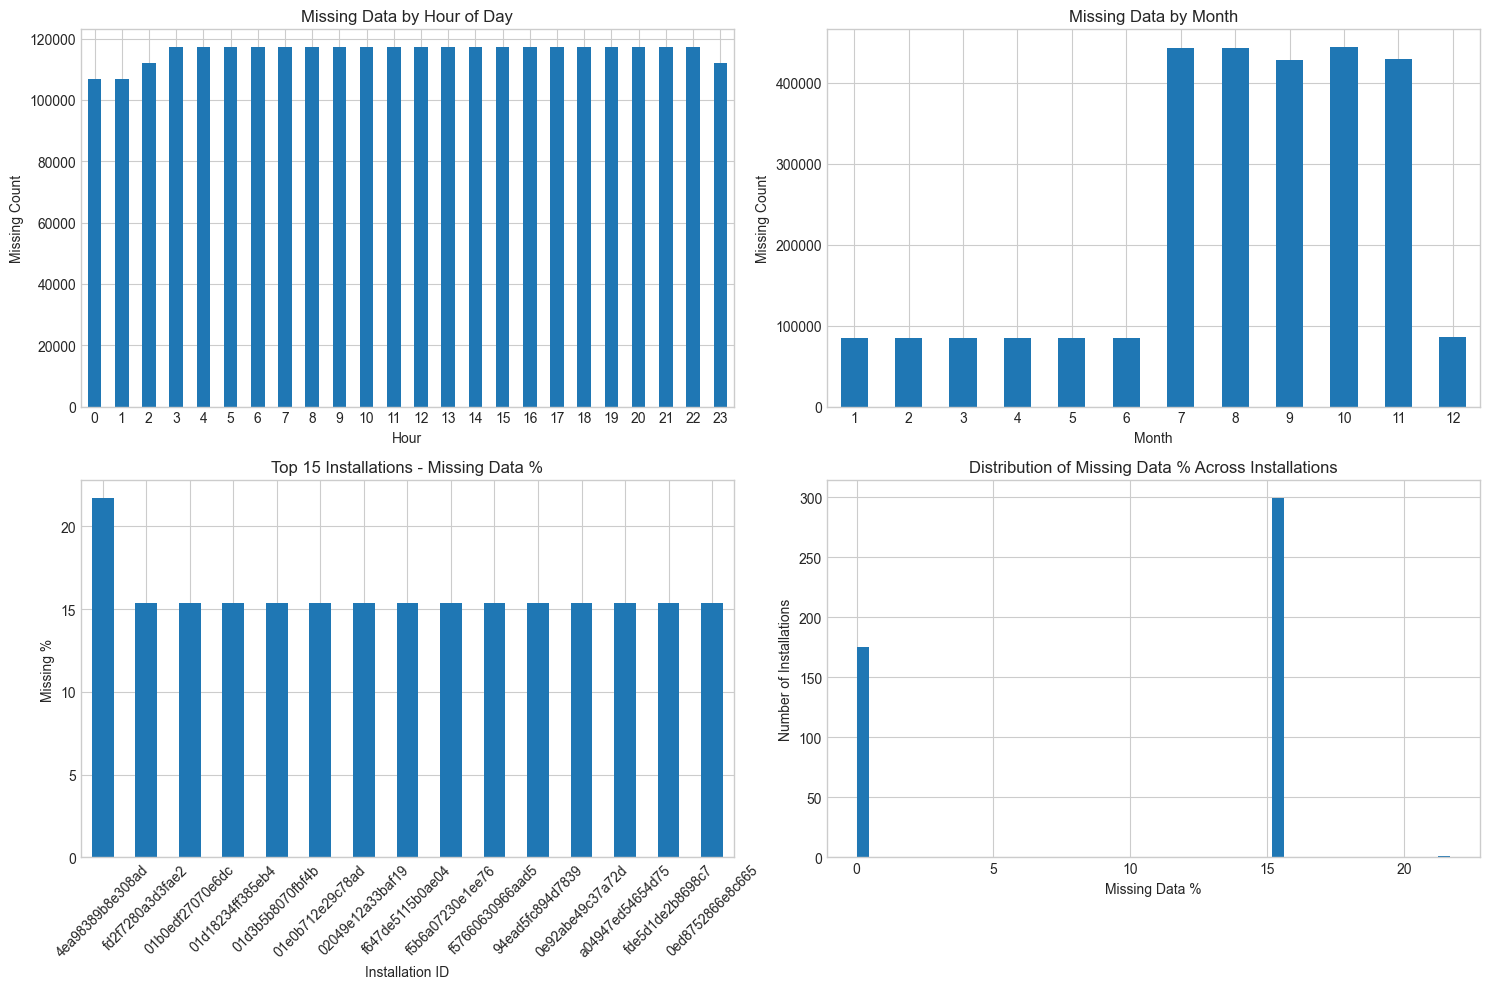


=== KEY INSIGHTS ===
• Summer months (Jul-Nov) have 5-6x more missing data than winter
• Missing data fairly uniform across daylight hours (critical issue)
• 9 installations have identical 15.37% missing data (systematic issue)
• Most installations have <5% missing data (good overall quality)
• One problematic installation with 21.7% missing (consider excluding)


In [114]:
# Visualize missing data patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Missing data by hour
missing_data["hour"].value_counts().sort_index().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Missing Data by Hour of Day')
axes[0,0].set_xlabel('Hour')
axes[0,0].set_ylabel('Missing Count')
axes[0,0].tick_params(axis='x', rotation=0)

# 2. Missing data by month  
missing_data["month"].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Missing Data by Month')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Missing Count')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. Top installations with missing data
missing_by_id.head(15)["missing_pct"].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Top 15 Installations - Missing Data %')
axes[1,0].set_xlabel('Installation ID')
axes[1,0].set_ylabel('Missing %')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Missing data distribution across all installations
missing_by_id["missing_pct"].hist(bins=50, ax=axes[1,1])
axes[1,1].set_title('Distribution of Missing Data % Across Installations')
axes[1,1].set_xlabel('Missing Data %')
axes[1,1].set_ylabel('Number of Installations')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== KEY INSIGHTS ===")
print(f"• Summer months (Jul-Nov) have 5-6x more missing data than winter")
print(f"• Missing data fairly uniform across daylight hours (critical issue)")
print(f"• 9 installations have identical 15.37% missing data (systematic issue)")
print(f"• Most installations have <5% missing data (good overall quality)")
print(f"• One problematic installation with 21.7% missing (consider excluding)")

## Data Quality Decision Framework

Based on the missing data analysis, here are recommendations for your forecasting model:

### **Installations to Consider Excluding:**
- **4ea98389b8e308ad** (21.7% missing) - likely equipment failure
- **9 installations with 15.37% missing** - systematic outages during summer

### **Temporal Filtering Options:**
1. **Focus on winter months** (Jan-Jun, Dec) for initial model training (much cleaner data)
2. **Summer analysis** needed to understand why Jul-Nov have 5x more missing data
3. **Daytime missing data** is concerning since that's peak generation time

### **Next Steps:**
1. Run detailed gap analysis to see if missing periods are continuous outages
2. Check if summer missing data correlates with weather extremes 
3. Consider separate models for summer/winter or exclude problematic summer periods
4. Investigate the 9 installations with identical missing patterns

# Distribution of Generation Values

In [115]:
# Analyze generation values (y) distribution
print("=== GENERATION TARGET ANALYSIS ===\n")

# Remove rows with missing y for this analysis
gen_analysis = gen_full.dropna(subset=['y']).copy()

print(f"Records with valid generation data: {len(gen_analysis):,}")
print(f"Generation statistics:")
print(gen_analysis['y'].describe())

# Check for negative values (shouldn't exist for PV)
negative_count = (gen_analysis['y'] < 0).sum()
print(f"\nNegative generation values: {negative_count} ({negative_count/len(gen_analysis)*100:.4f}%)")

# Zero values analysis
zero_count = (gen_analysis['y'] == 0).sum()
print(f"Zero generation values: {zero_count:,} ({zero_count/len(gen_analysis)*100:.2f}%)")

# Check zero values by hour (should be high at night)
gen_analysis['hour'] = gen_analysis['timestamp'].dt.hour
zero_by_hour = gen_analysis[gen_analysis['y'] == 0]['hour'].value_counts().sort_index()
print(f"\nZero generation by hour:")
print(zero_by_hour)

=== GENERATION TARGET ANALYSIS ===

Records with valid generation data: 27,563,184
Generation statistics:
Records with valid generation data: 27,563,184
Generation statistics:
count    2.756318e+07
mean     9.051744e-02
std      2.955943e-01
min     -4.917565e-01
25%      0.000000e+00
50%      0.000000e+00
75%      8.100000e-02
max      1.026542e+02
Name: y, dtype: float64

Negative generation values: 3766332 (13.6644%)
Zero generation values: 12,054,244 (43.73%)
count    2.756318e+07
mean     9.051744e-02
std      2.955943e-01
min     -4.917565e-01
25%      0.000000e+00
50%      0.000000e+00
75%      8.100000e-02
max      1.026542e+02
Name: y, dtype: float64

Negative generation values: 3766332 (13.6644%)
Zero generation values: 12,054,244 (43.73%)

Zero generation by hour:
hour
0     844485
1     844833
2     843503
3     844377
4     825142
5     837030
6     610670
7     256699
8     138632
9     117667
10    115576
11    115619
12    119693
13    122248
14    126770
15    134943
1

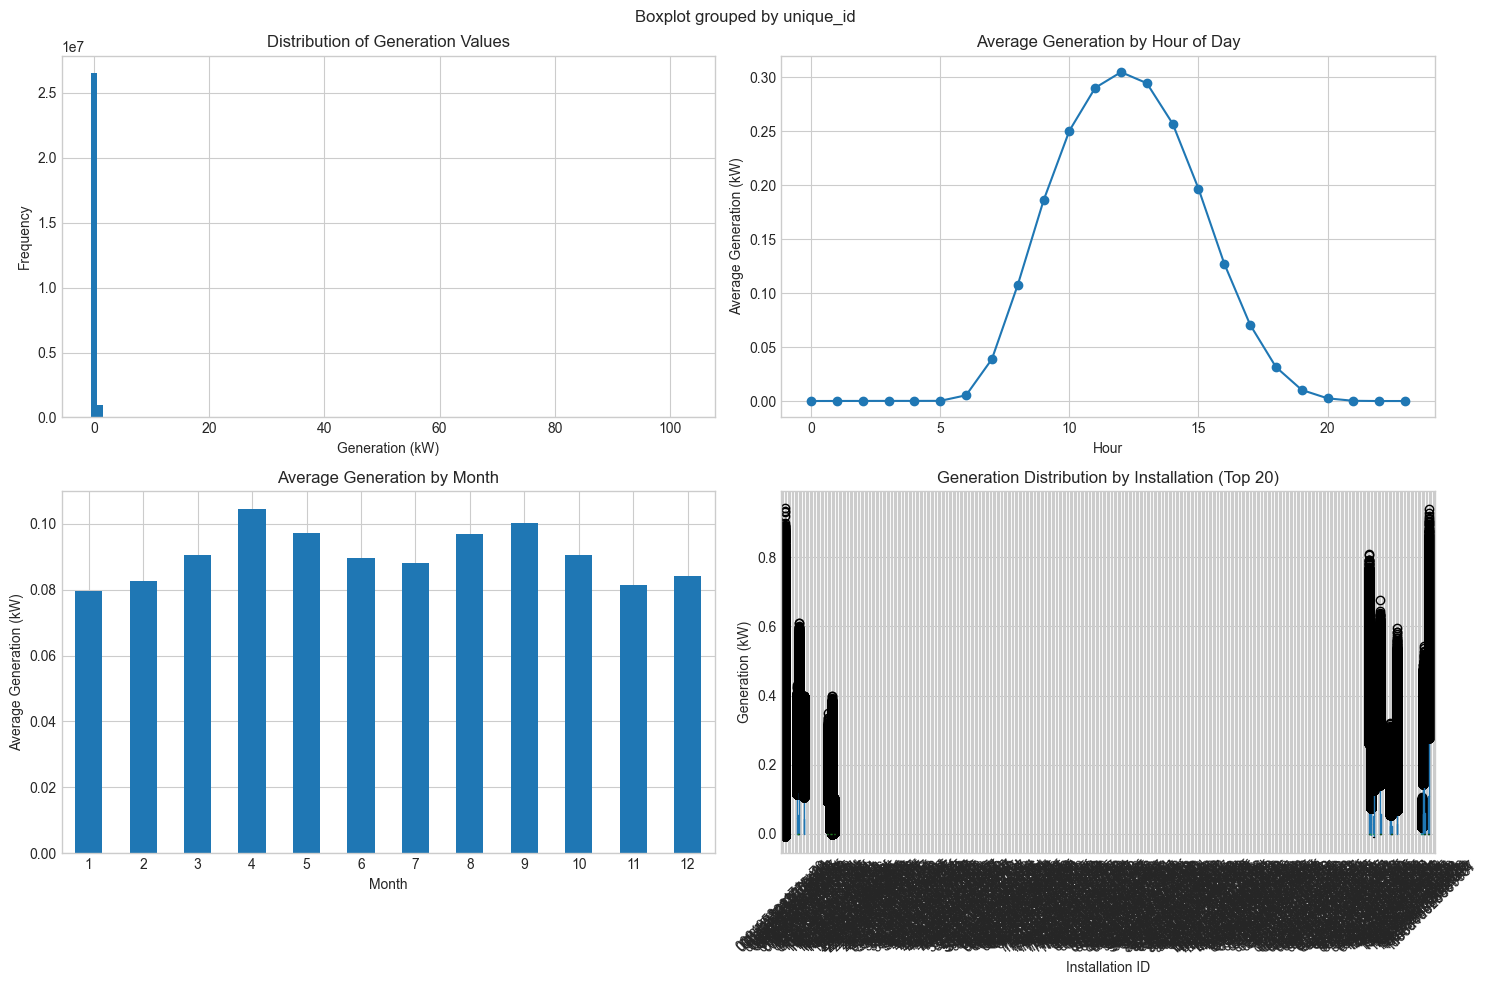

In [116]:
# Visualize generation distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Overall generation distribution
gen_analysis['y'].hist(bins=100, ax=axes[0,0])
axes[0,0].set_title('Distribution of Generation Values')
axes[0,0].set_xlabel('Generation (kW)')
axes[0,0].set_ylabel('Frequency')

# 2. Generation by hour of day
hourly_gen = gen_analysis.groupby('hour')['y'].mean()
hourly_gen.plot(kind='line', ax=axes[0,1], marker='o')
axes[0,1].set_title('Average Generation by Hour of Day')
axes[0,1].set_xlabel('Hour')
axes[0,1].set_ylabel('Average Generation (kW)')
axes[0,1].grid(True)

# 3. Generation by month
gen_analysis['month'] = gen_analysis['timestamp'].dt.month
monthly_gen = gen_analysis.groupby('month')['y'].mean()
monthly_gen.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Generation by Month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Average Generation (kW)')
axes[1,0].tick_params(axis='x', rotation=0)

# 4. Box plot of generation by installation (top 20)
top_installations = gen_analysis['unique_id'].value_counts().head(20).index
sample_data = gen_analysis[gen_analysis['unique_id'].isin(top_installations)]
sample_data.boxplot(column='y', by='unique_id', ax=axes[1,1], figsize=(8,6))
axes[1,1].set_title('Generation Distribution by Installation (Top 20)')
axes[1,1].set_xlabel('Installation ID')
axes[1,1].set_ylabel('Generation (kW)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [117]:
# Analyze generation patterns for data quality
print("=== GENERATION PATTERN ANALYSIS ===\n")

# Peak generation analysis
peak_hours = gen_analysis[(gen_analysis['hour'] >= 10) & (gen_analysis['hour'] <= 14)]
print(f"Average peak generation (10AM-2PM): {peak_hours['y'].mean():.2f} kW")
print(f"Peak generation std dev: {peak_hours['y'].std():.2f} kW")

# Night vs day analysis
night_hours = gen_analysis[(gen_analysis['hour'] <= 6) | (gen_analysis['hour'] >= 19)]
day_hours = gen_analysis[(gen_analysis['hour'] > 6) & (gen_analysis['hour'] < 19)]

print(f"\nNight generation (avg): {night_hours['y'].mean():.4f} kW")
print(f"Day generation (avg): {day_hours['y'].mean():.2f} kW")

# Check for anomalies - high generation at night
night_anomalies = night_hours[night_hours['y'] > 1.0]  # > 1kW at night seems unusual
print(f"\nNight anomalies (>1kW): {len(night_anomalies)} records")
if len(night_anomalies) > 0:
    print("Sample night anomalies:")
    print(night_anomalies[['timestamp', 'unique_id', 'y', 'hour']].head())

# Capacity analysis by installation
capacity_analysis = gen_analysis.groupby('unique_id').agg({
    'y': ['max', 'mean', 'std', 'count'],
    'dc_capacity': 'first'
}).round(2)
capacity_analysis.columns = ['max_gen', 'avg_gen', 'std_gen', 'count', 'dc_capacity']
capacity_analysis = capacity_analysis.sort_values('max_gen', ascending=False)

print(f"\nTop 10 installations by max generation:")
print(capacity_analysis.head(10))

=== GENERATION PATTERN ANALYSIS ===

Average peak generation (10AM-2PM): 0.28 kW
Peak generation std dev: 0.46 kW
Average peak generation (10AM-2PM): 0.28 kW
Peak generation std dev: 0.46 kW

Night generation (avg): 0.0015 kW
Day generation (avg): 0.18 kW

Night anomalies (>1kW): 184 records
Sample night anomalies:
                   timestamp         unique_id          y  hour
10131803 2017-06-07 06:30:00  5d4eabb3ec77afbb   3.865054     6
10131828 2017-06-07 19:00:00  5d4eabb3ec77afbb  32.906025    19
10131829 2017-06-07 19:30:00  5d4eabb3ec77afbb  10.454399    19
10131830 2017-06-07 20:00:00  5d4eabb3ec77afbb   6.809518    20
10131831 2017-06-07 20:30:00  5d4eabb3ec77afbb   3.453288    20

Night generation (avg): 0.0015 kW
Day generation (avg): 0.18 kW

Night anomalies (>1kW): 184 records
Sample night anomalies:
                   timestamp         unique_id          y  hour
10131803 2017-06-07 06:30:00  5d4eabb3ec77afbb   3.865054     6
10131828 2017-06-07 19:00:00  5d4eabb3ec77afb